# 1. IMPORT LIBRARIES

In [1]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

plt.rcParams['figure.figsize'] = (10, 5)
sns.set(style="whitegrid")

#  2. LOAD THE DATASET

In [2]:

data_path = "/content/Advertising.csv"
df = pd.read_csv(data_path)

print("Shape of dataset:", df.shape)
print("\nFirst 5 rows:")
print(df.head())


Shape of dataset: (200, 5)

First 5 rows:
   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


3. BASIC INFO & MISSING VALUES

In [ ]:

print("\nDataset Info:")
print(df.info())

print("\nMissing values per column:")
print(df.isnull().sum())


#  4. BASIC CLEANING

In [4]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

print("\nCleaned column names:")
print(df.columns)

# Example: assume target column is "sales" or "sales_value" etc.
# If your dataset has a different target column, change here.
possible_targets = ['sales', 'sales_value', 'total_sales', 'revenue']
target_col = None
for col in possible_targets:
    if col in df.columns:
        target_col = col
        break

if target_col is None:
    raise ValueError("❌ Could not detect target column. Please update 'target_col' manually!")

print("\nUsing target column:", target_col)

# Drop rows where target is missing
df = df.dropna(subset=[target_col])


Cleaned column names:
Index(['unnamed:_0', 'tv', 'radio', 'newspaper', 'sales'], dtype='object')

Using target column: sales


# 5. FEATURE / TARGET SPLIT

In [5]:
X = df.drop(columns=[target_col])
y = df[target_col]

print("\nFeature columns:")
print(X.columns)


Feature columns:
Index(['unnamed:_0', 'tv', 'radio', 'newspaper'], dtype='object')


# 6. IDENTIFY NUMERIC & CATEGORICAL FEATURES

In [6]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'bool']).columns.tolist()

print("\nNumeric features:", numeric_features)
print("Categorical features:", categorical_features)


Numeric features: ['unnamed:_0', 'tv', 'radio', 'newspaper']
Categorical features: []


# 7. PREPROCESSING PIPELINE

In [7]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

#  8. TRAIN–TEST SPLIT

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("\nTrain size:", X_train.shape, " Test size:", X_test.shape)


Train size: (160, 4)  Test size: (40, 4)


#  9. MODEL 1: LINEAR REGRESSION

In [11]:

linreg_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

linreg_model.fit(X_train, y_train)

y_pred_lin = linreg_model.predict(X_test)

mae_lin = mean_absolute_error(y_test, y_pred_lin)
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
r2_lin = r2_score(y_test, y_pred_lin)

print("\n===== Linear Regression Performance =====")
print("MAE :", mae_lin)
print("RMSE:", rmse_lin)
print("R²  :", r2_lin)



















===== Linear Regression Performance =====
MAE : 1.4650601050102927
RMSE: 1.788576100865966
R²  : 0.8986489151417081


#  10. MODEL 2: RANDOM FOREST REGRESSOR

In [12]:

rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(
        n_estimators=200,
        random_state=42
    ))
])

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("\n===== Random Forest Performance =====")
print("MAE :", mae_rf)
print("RMSE:", rmse_rf)
print("R²  :", r2_rf)


===== Random Forest Performance =====
MAE : 0.6762499999999994
RMSE: 0.8102649643789368
R²  : 0.9791997920864128


#  11. COMPARE MODELS


Model Comparison:

               Model      MAE      RMSE        R2
0  Linear Regression  1.46506  1.788576  0.898649
1      Random Forest  0.67625  0.810265  0.979200


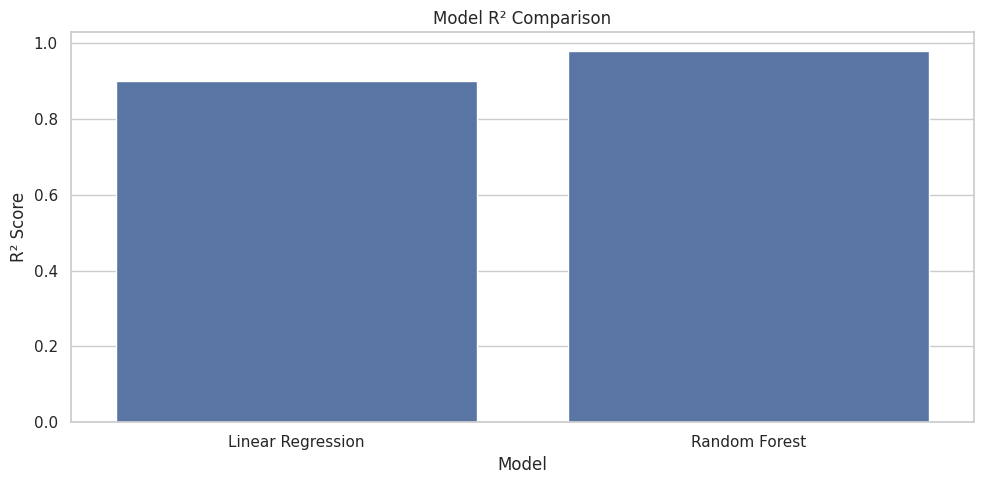

In [13]:

results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'MAE': [mae_lin, mae_rf],
    'RMSE': [rmse_lin, rmse_rf],
    'R2': [r2_lin, r2_rf]
})

print("\nModel Comparison:\n")
print(results)

plt.figure()
sns.barplot(data=results, x='Model', y='R2')
plt.title("Model R² Comparison")
plt.ylabel("R² Score")
plt.tight_layout()
plt.show()

#  12. PREDICTED VS ACTUAL PLOT (BEST MODEL)


Best model based on R²: Random Forest


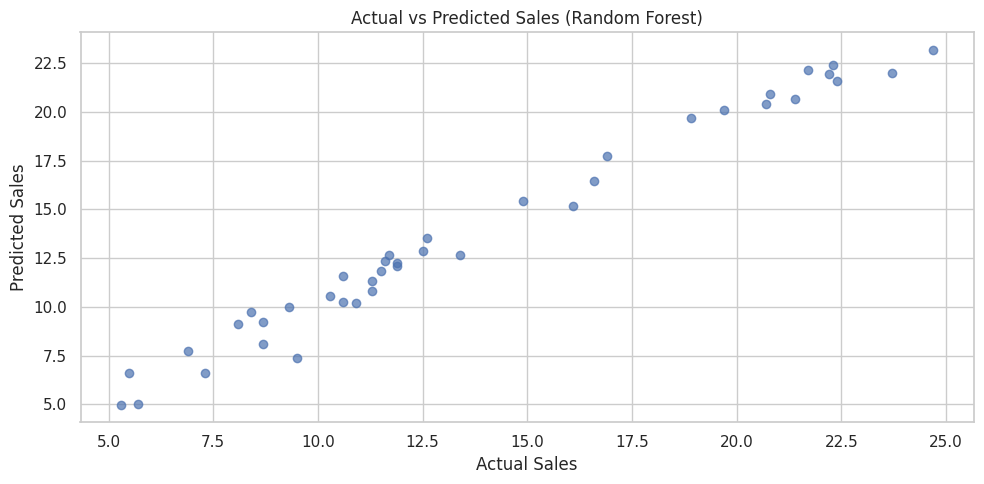

In [14]:

# Choose better model based on R²
best_model_name = 'Random Forest' if r2_rf >= r2_lin else 'Linear Regression'
best_pred = y_pred_rf if r2_rf >= r2_lin else y_pred_lin

print("\nBest model based on R²:", best_model_name)

plt.figure()
plt.scatter(y_test, best_pred, alpha=0.7)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title(f"Actual vs Predicted Sales ({best_model_name})")
plt.tight_layout()
plt.show()

# 13. FEATURE IMPORTANCE (ONLY FOR RANDOM FOREST)


Top 15 Important Features:
      feature  importance
1          tv    0.636487
2       radio    0.352184
3   newspaper    0.006939
0  unnamed:_0    0.004390


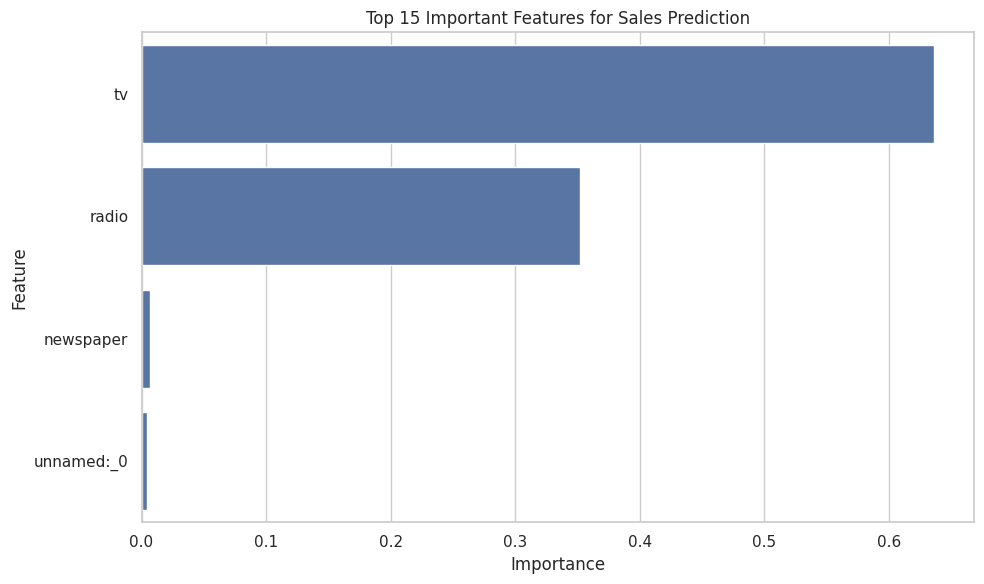

In [15]:

# We can only get feature importance after preprocessing explicitly
# So we fit a separate RandomForest on transformed data

# First, fit preprocessor alone on full data
X_full_processed = preprocessor.fit_transform(X)

rf_raw = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)
rf_raw.fit(X_full_processed, y)

# Extract feature names after encoding
# Numeric features remain same; categorical become one-hot columns
cat_feature_names = []
if categorical_features:
    onehot = preprocessor.named_transformers_['cat'].named_steps['onehot']
    cat_feature_names = onehot.get_feature_names_out(categorical_features).tolist()

all_feature_names = numeric_features + cat_feature_names
importances = rf_raw.feature_importances_
feat_imp = pd.DataFrame({
    'feature': all_feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False).head(15)

print("\nTop 15 Important Features:")
print(feat_imp)

plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp, x='importance', y='feature')
plt.title("Top 15 Important Features for Sales Prediction")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

#  14. SAVE BEST MODEL

In [16]:

import joblib

joblib.dump(rf_model, "best_sales_model.pkl")
print("\n✅ Best model saved as 'best_sales_model.pkl'")

print("\n✅ Sales Prediction Task Completed Successfully!")


✅ Best model saved as 'best_sales_model.pkl'

✅ Sales Prediction Task Completed Successfully!
